In [ ]:
!pip install datasets transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 21.0 MB/s 
     |████████████████████████████████| 5.5 MB 45.2 MB/s 
     |████████████████████████████████| 115 kB 62.6 MB/s 
     |████████████████████████████████| 182 kB 60.6 MB/s 
     |████████████████████████████████| 212 kB 61.2 MB/s 
     |████████████████████████████████| 127 kB 76.6 MB/s 
     |████████████████████████████████| 7.6 MB 52.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


**Load a dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#root_dir = '../content/drive/MyDrive/dataset_r/Dataset_BUSI_with_GT'
#path = Path(root_dir)
#path_images = list(path.glob('**/*.png'))

In [ ]:
from datasets import load_dataset

ds = load_dataset('/content/drive/MyDrive/BreaKHis 400X')
ds 

Resolving data files:   0%|          | 0/1148 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/545 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to /root/.cache/huggingface/datasets/imagefolder/BreaKHis 400X-9972a1a85e63457b/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 1148
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 545
    })
})

In [ ]:
ex = ds['train'][400]
ex

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=700x460 at 0x7F9946927790>,
 'label': 1}

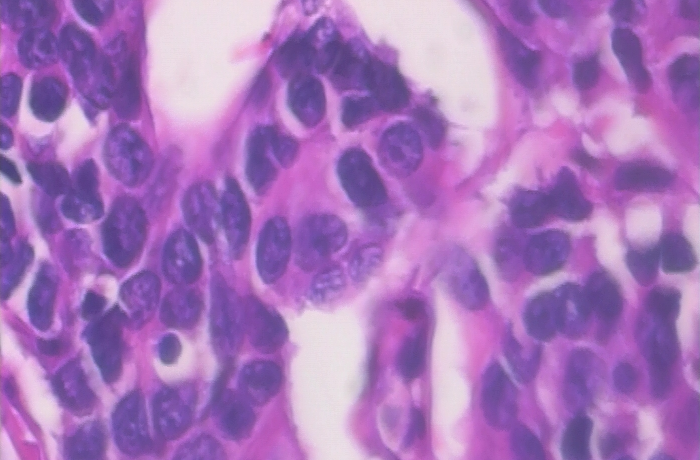

In [ ]:
image = ex['image']
image

In [ ]:
labels = ds['train'].features['label']
labels



ClassLabel(names=['benign', 'malignant'], id=None)

In [ ]:
labels.int2str(ex['label'])

'malignant'

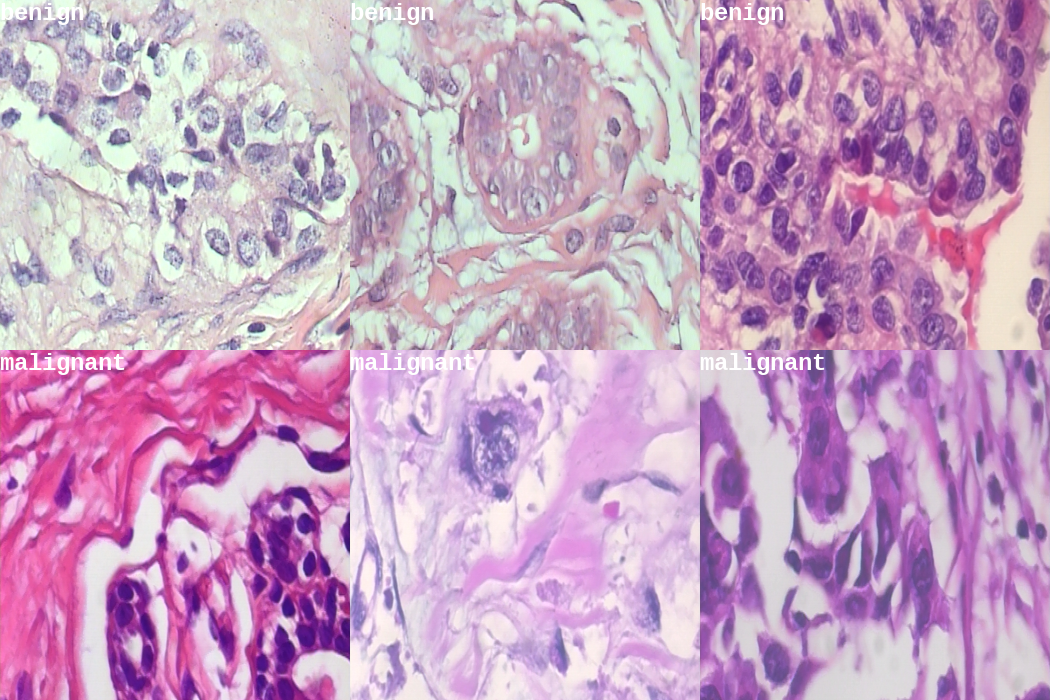

In [ ]:
import random
from PIL import ImageDraw, ImageFont, Image

def show_examples(ds, seed: int = 1234, examples_per_class: int = 3, size=(350, 350)):

    w, h = size
    labels = ds['train'].features['label'].names
    grid = Image.new('RGB', size=(examples_per_class * w, len(labels) * h))
    draw = ImageDraw.Draw(grid)
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf", 24)

    for label_id, label in enumerate(labels):

        # Filter the dataset by a single label, shuffle it, and grab a few samples
        ds_slice = ds['train'].filter(lambda ex: ex['label'] == label_id).shuffle(seed).select(range(examples_per_class))

        # Plot this label's examples along a row
        for i, example in enumerate(ds_slice):
            image = example['image']
            idx = examples_per_class * label_id + i
            box = (idx % examples_per_class * w, idx // examples_per_class * h)
            grid.paste(image.resize(size), box=box)
            draw.text(box, label, (255, 255, 255), font=font)

    return grid

show_examples(ds, seed=random.randint(0, 1337), examples_per_class=3)

**Loading ViT Feature Extractor**

In [ ]:
from transformers import ViTFeatureExtractor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)

loading configuration file preprocessor_config.json from cache at /root/.cache/huggingface/hub/models--google--vit-base-patch16-224-in21k/snapshots/1ba429d32753f33a0660b80ac6f43a3c80c18938/preprocessor_config.json
Feature extractor ViTFeatureExtractor {
  "do_normalize": true,
  "do_resize": true,
  "feature_extractor_type": "ViTFeatureExtractor",
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "size": 224
}



In [ ]:
feature_extractor(image, return_tensors='pt')

{'pixel_values': tensor([[[[-0.1451, -0.1529, -0.1922,  ...,  0.0196,  0.0118, -0.0588],
          [-0.1294, -0.1373, -0.1686,  ..., -0.0118, -0.0118, -0.0745],
          [-0.0824, -0.1059, -0.1529,  ..., -0.0353, -0.0275, -0.0745],
          ...,
          [ 0.6000,  0.6941,  0.7490,  ...,  0.3020,  0.3176,  0.2627],
          [ 0.6078,  0.6863,  0.7490,  ...,  0.3098,  0.3255,  0.2627],
          [ 0.6000,  0.6706,  0.7490,  ...,  0.3333,  0.3255,  0.2392]],

         [[-0.3961, -0.4039, -0.4275,  ..., -0.3647, -0.3647, -0.3569],
          [-0.3882, -0.3882, -0.4118,  ..., -0.3725, -0.3725, -0.3647],
          [-0.3569, -0.3882, -0.4039,  ..., -0.3882, -0.3882, -0.3725],
          ...,
          [ 0.2941,  0.3804,  0.4510,  ..., -0.3020, -0.2549, -0.2000],
          [ 0.3020,  0.3725,  0.4510,  ..., -0.2863, -0.2314, -0.1922],
          [ 0.2941,  0.3647,  0.4431,  ..., -0.2706, -0.2235, -0.1922]],

         [[ 0.1686,  0.2235,  0.1765,  ...,  0.3020,  0.2784,  0.2078],
          [ 0

**Processing the Dataset**

In [ ]:
def process_example(example):
    inputs = feature_extractor(example['image'], return_tensors='pt')
    inputs['label'] = example['label']
    return inputs

In [ ]:
process_example(ds['train'][0])

{'pixel_values': tensor([[[[0.4745, 0.4588, 0.4431,  ..., 0.4745, 0.4824, 0.4588],
          [0.4510, 0.4588, 0.4510,  ..., 0.4745, 0.4745, 0.4510],
          [0.4588, 0.4902, 0.4667,  ..., 0.4667, 0.4667, 0.4431],
          ...,
          [0.5451, 0.5608, 0.5529,  ..., 0.5451, 0.5451, 0.5294],
          [0.5451, 0.5451, 0.5373,  ..., 0.5529, 0.5451, 0.5294],
          [0.5216, 0.5294, 0.5216,  ..., 0.5373, 0.5373, 0.5373]],

         [[0.4745, 0.4510, 0.4196,  ..., 0.2392, 0.2706, 0.2941],
          [0.4588, 0.4431, 0.4196,  ..., 0.2471, 0.2627, 0.2784],
          [0.4824, 0.4902, 0.4588,  ..., 0.2549, 0.2627, 0.2784],
          ...,
          [0.4039, 0.3490, 0.2941,  ..., 0.6314, 0.6235, 0.6157],
          [0.3882, 0.3333, 0.3020,  ..., 0.6392, 0.6314, 0.6235],
          [0.3725, 0.3255, 0.3020,  ..., 0.6314, 0.6314, 0.6235]],

         [[0.4980, 0.4980, 0.4824,  ..., 0.3647, 0.3961, 0.4353],
          [0.4745, 0.4902, 0.4980,  ..., 0.3725, 0.3961, 0.4275],
          [0.4902, 0.5216

In [ ]:
ds = load_dataset('/content/drive/MyDrive/BreaKHis 400X')

def transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = feature_extractor([x for x in example_batch['image']], return_tensors='pt')

    # Don't forget to include the labels!
    inputs['label'] = example_batch['label']
    return inputs

Resolving data files:   0%|          | 0/1148 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/545 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
prepared_ds = ds.with_transform(transform)

In [ ]:
prepared_ds['train'][0:2]

{'pixel_values': tensor([[[[ 0.4745,  0.4588,  0.4431,  ...,  0.4745,  0.4824,  0.4588],
          [ 0.4510,  0.4588,  0.4510,  ...,  0.4745,  0.4745,  0.4510],
          [ 0.4588,  0.4902,  0.4667,  ...,  0.4667,  0.4667,  0.4431],
          ...,
          [ 0.5451,  0.5608,  0.5529,  ...,  0.5451,  0.5451,  0.5294],
          [ 0.5451,  0.5451,  0.5373,  ...,  0.5529,  0.5451,  0.5294],
          [ 0.5216,  0.5294,  0.5216,  ...,  0.5373,  0.5373,  0.5373]],

         [[ 0.4745,  0.4510,  0.4196,  ...,  0.2392,  0.2706,  0.2941],
          [ 0.4588,  0.4431,  0.4196,  ...,  0.2471,  0.2627,  0.2784],
          [ 0.4824,  0.4902,  0.4588,  ...,  0.2549,  0.2627,  0.2784],
          ...,
          [ 0.4039,  0.3490,  0.2941,  ...,  0.6314,  0.6235,  0.6157],
          [ 0.3882,  0.3333,  0.3020,  ...,  0.6392,  0.6314,  0.6235],
          [ 0.3725,  0.3255,  0.3020,  ...,  0.6314,  0.6314,  0.6235]],

         [[ 0.4980,  0.4980,  0.4824,  ...,  0.3647,  0.3961,  0.4353],
          [ 0

**Training and Evaluation**

In [ ]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'label': torch.tensor([x['label'] for x in batch])
    }



In [ ]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")
def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)

In [ ]:
from transformers import ViTForImageClassification

labels = ds['train'].features['label'].names

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--google--vit-base-patch16-224-in21k/snapshots/1ba429d32753f33a0660b80ac6f43a3c80c18938/config.json
Model config ViTConfig {
  "_name_or_path": "google/vit-base-patch16-224-in21k",
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "id2label": {
    "0": "benign",
    "1": "malignant"
  },
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "benign": "0",
    "malignant": "1"
  },
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.24.0"
}

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--google--vit-base-patch16-224-in21k/snapshots/1ba429d327

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="./vit-base-breast",
  per_device_train_batch_size=16,
  evaluation_strategy="steps",
  num_train_epochs=4,
  #fp16=True,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to='tensorboard',
  load_best_model_at_end=True,
)

PyTorch: setting up devices


In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_ds["train"],
    eval_dataset=prepared_ds["test"],
    tokenizer=feature_extractor,
)

In [ ]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

***** Running training *****
  Num examples = 1148
  Num Epochs = 4
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 288
  Number of trainable parameters = 85800194


TypeError: ignored

In [ ]:
metrics = trainer.evaluate(prepared_ds['test'])
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)



***** Running Evaluation *****
  Num examples = 133
  Batch size = 8


***** eval metrics *****
  epoch                   =        4.0
  eval_accuracy           =     0.9925
  eval_loss               =     0.0491
  eval_runtime            = 0:01:25.97
  eval_samples_per_second =      1.547
  eval_steps_per_second   =      0.198
